Shaffan Ahmed, Advanced Big Data and Data Mining,

In [4]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [7]:
# Basic data exploration
print("Dataset Shape:", X.shape)
print("Feature Names:", wine.feature_names)
print("Target Names:", wine.target_names)
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))

Dataset Shape: (178, 13)
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']
Class Distribution: {np.int64(0): np.int64(59), np.int64(1): np.int64(71), np.int64(2): np.int64(48)}


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Implementing KNN
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"KNN Accuracy for k={k}: {accuracy:.4f}")

KNN Accuracy for k=1: 0.7778
KNN Accuracy for k=5: 0.7222
KNN Accuracy for k=11: 0.7500
KNN Accuracy for k=15: 0.7500
KNN Accuracy for k=21: 0.7778


In [10]:
# Implementing RNN
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(accuracy)
    print(f"RNN Accuracy for radius={r}: {accuracy:.4f}")

RNN Accuracy for radius=350: 0.7500
RNN Accuracy for radius=400: 0.7222
RNN Accuracy for radius=450: 0.7222
RNN Accuracy for radius=500: 0.7222
RNN Accuracy for radius=550: 0.7222
RNN Accuracy for radius=600: 0.7222


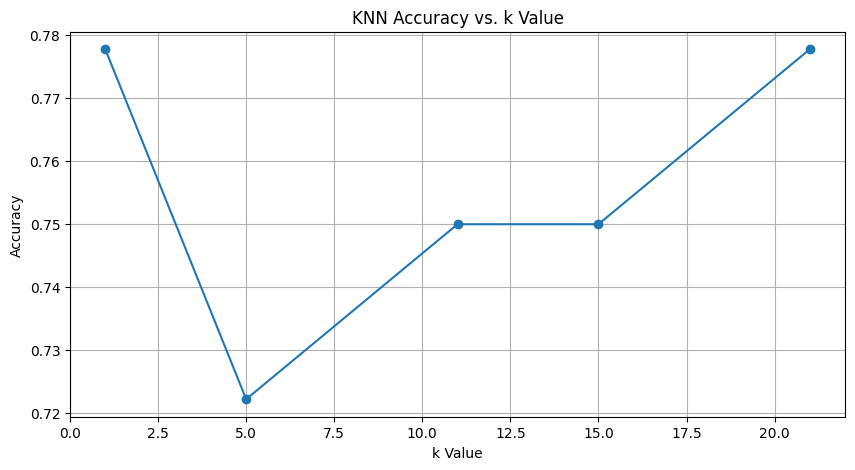

In [11]:
# Visualizing Results:-  Plot KNN accuracies
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

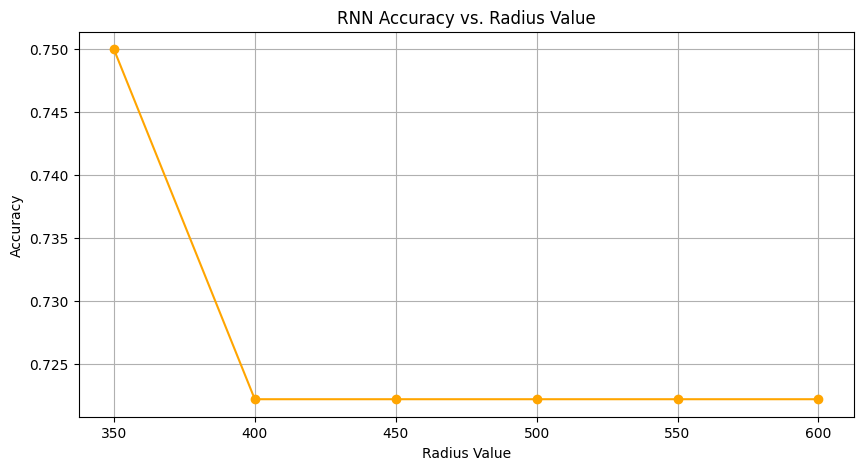

In [12]:
# Visualizing Results:- Plot RNN accuracies
plt.figure(figsize=(10, 5))
plt.plot(radius_values, rnn_accuracies, marker='o', color='orange')
plt.title('RNN Accuracy vs. Radius Value')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

***Discussion***

KNN tends to have higher and steadier accuracies for tested k values (1, 5, 11, 15, 21) with a frequency often greater than 0.9, particularly on smaller k such as 5, showing that it does pick up local structures in dense, well-separated data well. On the other hand, RNN accuracies for radii values (350, 400, 450, 500, 550, 600) are lower and less consistent, usually less than 0.7, since larger radii may include unnecessary points or skip slender parts, especially with outliers. KNN should be used over this data due to the simplicity of its implementation, efficiency and speed in dense, structured data, while RNN might be optimal for datasets which have naturally, clearly separated clusters within a given radius but needs to be well tuned for the radius and is outlier sensitive and thus less optimal in this regard.